In [1]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

from analyze import best_gmm
from gmm import gmm

# Objective

In this notebook we fit a Gaussian Mixture Model (GMM) for multiple numeric variables. For such, we use our own implementation of GMM which can be found in the `gmm.py` and `analyze.py` modules. The datasets used for this purpose are:

1. Penguin dataset: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/
2. Iris dataset: https://www.kaggle.com/datasets/uciml/iris

# Utilities

In [2]:
def plot_true_vs_rvs(X: np.ndarray, skmodel: GaussianMixture, ax: plt.Axes = None):
    """Plots data true data vs simulated data from GMM as histograms.

    Parameters
    ----------
    X : np.ndarray
        True data. Used to fit `gmm`.

    gmm : GaussianMixture
        Fitted :class:`GaussianMixture` instance.
    """
    if ax is None:
        ax = plt.subplot()

    
    X_true = pd.Series(X.flatten())

    # Extract estimated parameters from fitted sk model.
    mu = skmodel.means_
    cov = skmodel.covariances_
    wgt = skmodel.weights_

    # Create random sample (simulated data)
    sample = gmm.rvs(wgt, mu, cov, size=X_true.shape[0])
    X_pred = pd.Series(sample.flatten())


    X_true.hist(ax=ax)
    X_pred.hist(ax=ax)

    return ax



def analyze(df: pd.DataFrame, features: list[str]) :
    """Executes Gaussian Mixture Model (GMM) analysis.

    Chooses the best GMM for each specified fiture and plots
    the real feature values vs simulated from the fitted GMM.

    Parameters
    ----------
    df : pd.DataFrame
        Data containing the features to analyze.

    features : list of str
        Features to analyze.
    """
    
    # Get the best GMM for each numeric feature.
    summaries : dict[str, analyze.GMMSummary] = {}

    
    # Get the best gmm for each feature.
    for feat in features:
        X = df[feat].dropna().values.reshape(-1, 1)
        summaries[feat] = best_gmm(X)


    # Plot histograms
    nrows = len(summaries) // 2
    fig, axs = plt.subplots(nrows, 2)
    axs = axs.flatten()
    
    # Adjust figure.
    fig.subplots_adjust(hspace=0.5)
    fig.suptitle("True vs Simulated data")
    
    for i, (feat, summary) in enumerate(summaries.items()):
        ax = axs[i]
        X = df[feat].dropna().values
        ax = plot_true_vs_rvs(X, summary.fit, ax)
        ax.set_title(feat) 

    return ax

# Penguin dataset

<Axes: title={'center': 'body_mass_g'}>

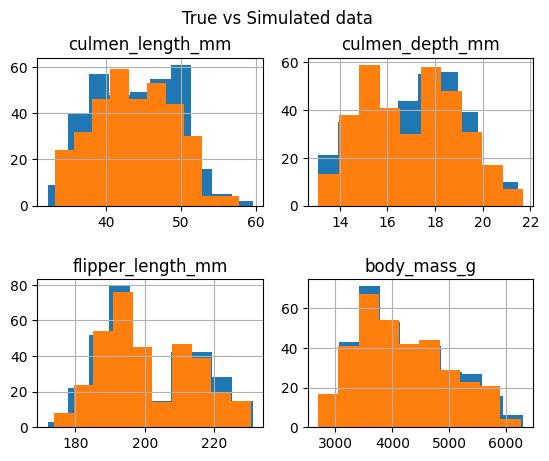

In [3]:
# Read + Feature selection + Analyze

df = pd.read_csv("data/penguins_size.csv")
numeric_features = df.dtypes[df.dtypes == float].index.tolist()
analyze(df, numeric_features)

# Iris dataset

<Axes: title={'center': 'PetalWidthCm'}>

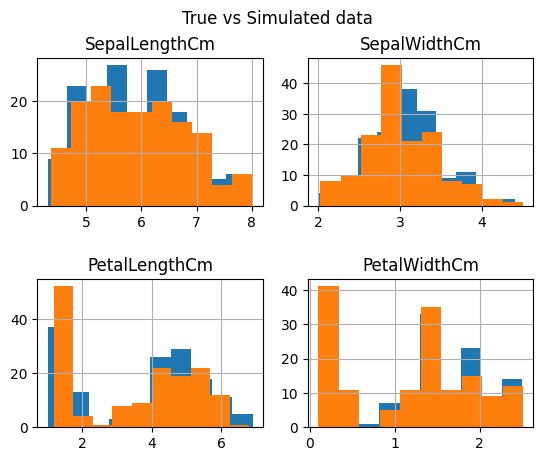

In [4]:
# Read + Feature selection + Analyze

df = pd.read_csv("data/Iris.csv")
numeric_features = df.dtypes[df.dtypes == float].index.tolist()
analyze(df, numeric_features)